<a href="https://colab.research.google.com/github/gabrielcgo/PROJETOBLUESUB/blob/main/notebooks/playground/COVID_correlacao_Filmes2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
covid = pd.read_csv('/content/covid_region.csv')
movies = pd.read_csv('/content/movies_2018_2023.csv')

#  Modelando o dataset COVID

In [4]:
covid.head()

,WHO Region,Date,Confirmed,Deaths,Recovered,Active
0,Africa,2020-01-22,0,0,0,0
1,Africa,2020-01-23,0,0,0,0
2,Africa,2020-01-24,0,0,0,0
3,Africa,2020-01-25,0,0,0,0
4,Africa,2020-01-26,0,0,0,0


In [5]:
covid['Date'] = pd.to_datetime(covid['Date'])
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   WHO Region  1128 non-null   object        
 1   Date        1128 non-null   datetime64[ns]
 2   Confirmed   1128 non-null   int64         
 3   Deaths      1128 non-null   int64         
 4   Recovered   1128 non-null   int64         
 5   Active      1128 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 53.0+ KB


In [6]:
covid2 = covid

In [7]:
covid2['Date'] = covid2['Date'].map(lambda x: 100*x.year + x.month)

In [8]:
covid2.head()

,WHO Region,Date,Confirmed,Deaths,Recovered,Active
0,Africa,202001,0,0,0,0
1,Africa,202001,0,0,0,0
2,Africa,202001,0,0,0,0
3,Africa,202001,0,0,0,0
4,Africa,202001,0,0,0,0


#  Modelando o dataset Filmes

In [9]:
movies.head()

,Title,Rating,Year,Month,Runtime,Genre,Filming_location,Budget,Income,Country_of_origin
0,Avatar: The Way of Water,8.0,2022,12,192,"Action, Adventure, Fantasy",New Zealand,"$350,000,000","$681,081,686",United States
1,Guillermo del Toro's Pinocchio,7.8,2022,12,117,"Animation, Drama, Family",USA,"$35,000,000","$71,614","United States, Mexico, France"
2,Bullet Train,7.3,2022,8,127,"Action, Comedy, Thriller",Japan,"$85,900,000","$239,268,602","Japan, United States"
3,Amsterdam,6.1,2022,10,134,"Comedy, Drama, History",USA,"$80,000,000","$31,245,810","United States, Japan"
4,Violent Night,6.9,2022,12,112,"Action, Comedy, Crime",Canada,"$20,000,000","$59,595,460","United States, Canada"


In [10]:
movies['Year'] = movies['Year'].astype(str)
movies['Month'] = movies['Month'].astype(str)

In [11]:
movies['Date'] = movies['Year'] + "-" + movies['Month']

In [12]:
movies2 = movies.drop(columns=['Year', 'Month'])

movies2['Date'] = pd.to_datetime(movies2['Date'])

movies2['Date'] = movies2['Date'].map(lambda x: 100*x.year + x.month)

In [13]:
movies2.head()

,Title,Rating,Runtime,Genre,Filming_location,Budget,Income,Country_of_origin,Date
0,Avatar: The Way of Water,8.0,192,"Action, Adventure, Fantasy",New Zealand,"$350,000,000","$681,081,686",United States,202212
1,Guillermo del Toro's Pinocchio,7.8,117,"Animation, Drama, Family",USA,"$35,000,000","$71,614","United States, Mexico, France",202212
2,Bullet Train,7.3,127,"Action, Comedy, Thriller",Japan,"$85,900,000","$239,268,602","Japan, United States",202208
3,Amsterdam,6.1,134,"Comedy, Drama, History",USA,"$80,000,000","$31,245,810","United States, Japan",202210
4,Violent Night,6.9,112,"Action, Comedy, Crime",Canada,"$20,000,000","$59,595,460","United States, Canada",202212


#   Correlação COVID x FILMES

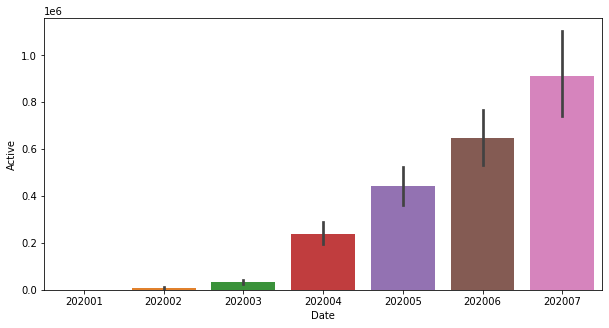

In [26]:
plt.figure(figsize=(10,5))
sns.barplot(data = covid2, x = 'Date', y = 'Active')

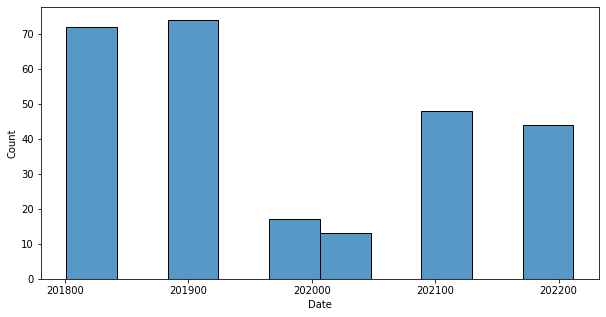

In [50]:
plt.figure(figsize=(10,5))
sns.histplot(x = 'Date', data = movies2, stat = 'count')

In [39]:
#  não faz sentido 2020 estar divido em 2??????

movies2['Date'].unique()

array([202212, 202208, 202210, 202211, 202203, 202209, 202205, 202204,
       202207, 202201, 202206, 202202, 202110, 202112, 202101, 202108,
       202106, 202104, 202103, 202111, 202105, 202107, 202109, 202009,
       202003, 202010, 202012, 202002, 202001, 202008, 202011, 202007,
       202005, 201911, 201907, 201904, 201910, 201901, 201912, 201902,
       201903, 201905, 201909, 201908, 201906, 201811, 201802, 201806,
       201804, 201805, 201803, 201810, 201808, 201812, 201807, 201809,
       201801])